In [25]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
#there are two csv files. This one is from a webscrapping project from crunchyroll website.https://www.kaggle.com/filipefilardi/crunchyroll-anime-ratings
#looking for the longest shows availbable in Crunchyroll to waste time in. Compare them to see how they fared against each other.

inpath='resources/crunch_anime.csv'

cruch_csv=pd.read_csv(inpath)

#Original CSV Maker Explanations
# anime - English name of the anime
# episodes - number of episodes hosted by Crunchyroll of the anime
# votes - number of votes of the anime
# rate_1_stars - the quantity of 1 stars votes of the anime
# rate_2_stars - the quantity of 2 stars votes of the anime
# rate_3_stars - the quantity of 3 stars votes of the anime
# rate_4_stars - the quantity of 4 stars votes of the anime
# rate_5_stars - the quantity of 5 stars votes of the anime
# rate - an average rating out of 5 stars of the anime

In [3]:
# cruch_csv.info()

In [4]:
#Removing irrelavant columns and selected only the anime with over 20 votes

del(cruch_csv['genre_romance'],cruch_csv['genre_sci-fi'],cruch_csv['genre_seinen'],cruch_csv['genre_sgdrama'],cruch_csv['genre_shojo'],cruch_csv['genre_shonen'],
    cruch_csv['genre_slice of life'],cruch_csv['genre_sports'],cruch_csv['genre_supernatural'],cruch_csv['genre_thriller'],cruch_csv['genre_action'],cruch_csv['genre_adventure'],
    cruch_csv['genre_comedy'],cruch_csv['genre_drama'],cruch_csv['genre_family'],cruch_csv['genre_fantasy'],cruch_csv['genre_food'],cruch_csv['genre_harem'],cruch_csv['genre_historical'],
    cruch_csv['genre_horror'],cruch_csv['genre_idols'],cruch_csv['genre_isekai'],cruch_csv['genre_jdrama'],cruch_csv['genre_magical girls'],cruch_csv['genre_martial arts'],
    cruch_csv['genre_mecha'],cruch_csv['genre_music'],cruch_csv['genre_mystery'],cruch_csv['genre_post-apocalyptic'], cruch_csv['anime_url'],cruch_csv['anime_img'], cruch_csv['weight'])
cruch_csv=cruch_csv.loc[cruch_csv.votes >=20,]


In [5]:
#Some animes had episodes listed as 0. This is impossible. These anime are eithers movies, on-going, or unknown. 
# One of the anime listed as is Cased Closed (Detective Conan) with over 24 years and 900 episodes.

unknown_epsodes =cruch_csv.loc[cruch_csv['episodes']==0]
unknown_epsodes=unknown_epsodes.sort_values('rate', ascending=False)
unknown_epsodes
#Some of these animes had great ratings. 
#One of the anime listed as 0 episodes is Cased Closed (Detective Conan) with over 24 years and 900 episodes.

highrate_unknown=unknown_epsodes.loc[unknown_epsodes['rate']>4.9]
highrate_unknown

,anime,episodes,votes,rate,rate_1,rate_2,rate_3,rate_4,rate_5
776,Antiquarian Bookshop Biblia's Case Files,0,23,4.96,0,0,0,1,22
583,Ping Pong the Animation,0,47,4.96,0,0,1,0,46
803,The Tatami Galaxy,0,21,4.95,0,0,0,1,20
372,Rozen Maiden,0,102,4.94,0,0,3,0,99
267,Cowboy Bebop,0,171,4.93,0,0,4,4,163
388,Case Closed,0,97,4.92,0,0,0,8,89
525,Happy Boys,0,56,4.91,0,0,0,5,51
281,Fruits Basket,0,161,4.91,0,0,3,9,149
4,Skip Beat!,0,15011,4.91,98,20,112,696,14085


In [6]:
#looking for anime with the highest number of 5-star votes. Popularity.
star5= cruch_csv.drop(columns=['rate_1','rate_2','rate_3','rate_4'])
star5.sort_values('rate_5', ascending=False)
star5

,anime,episodes,votes,rate,rate_5
0,Naruto Shippuuden,500,48518,4.81,43974
1,Shugo Chara,51,33688,4.86,31044
2,BLEACH,366,23900,4.83,21584
3,Naruto,220,16613,4.80,14993
4,Skip Beat!,0,15011,4.91,14085
...,...,...,...,...,...
821,Military!,12,20,3.20,8
822,Last Period: the journey to the end of the des...,12,20,3.15,6
823,Mahou Shoujo? Naria Girls,12,20,2.55,4
824,Schoolgirl Strikers,13,20,2.50,3


In [7]:
#looking for anime with the highest number of 1-star votes. Unpopularity.

star1= cruch_csv.drop(columns=['rate_5','rate_2','rate_3','rate_4'])
star1=star1.sort_values('rate_1', ascending=False)
star1

,anime,episodes,votes,rate,rate_1
0,Naruto Shippuuden,500,48518,4.81,1111
1,Shugo Chara,51,33688,4.86,503
3,Naruto,220,16613,4.80,456
2,BLEACH,366,23900,4.83,391
16,School Days,0,3484,4.13,371
...,...,...,...,...,...
675,Garakowa -Restore the World-,3,34,3.82,0
680,Nobunaga Concerto (Drama),0,33,4.61,0
682,Harukana Receive,12,33,4.42,0
683,DOUBLE DECKER! DOUG & KIRILL,16,33,4.30,0


In [8]:
#looking for anime with the zero number of 1-star votes. No one who voted hated it or if they hated it, don't bother to vote, or the info is unknown.

no1star=star1.loc[star1['rate_1']==0]
no1star

,anime,episodes,votes,rate,rate_1
742,Mischievous Kiss 2 - Love in Okinawa,17,27,4.85,0
751,Full Metal Panic!,0,26,4.77,0
737,Moyashimon,22,28,4.50,0
744,Inugami-san to Nekoyama-san,12,27,4.33,0
741,Os Cavaleiros do Zodíaco,114,27,4.96,0
...,...,...,...,...,...
675,Garakowa -Restore the World-,3,34,3.82,0
680,Nobunaga Concerto (Drama),0,33,4.61,0
682,Harukana Receive,12,33,4.42,0
683,DOUBLE DECKER! DOUG & KIRILL,16,33,4.30,0


In [9]:
#The more important tables, How are the longest shows in Crunchyroll are voted?
long_cruch=cruch_csv.loc[cruch_csv['episodes'] > 100].sort_values('episodes', ascending=False)
long_cruch

,anime,episodes,votes,rate,rate_1,rate_2,rate_3,rate_4,rate_5
57,One Piece,1135,1142,4.70,42,15,35,63,987
0,Naruto Shippuuden,500,48518,4.81,1111,275,817,2341,43974
6,Gintama,379,11435,4.87,133,47,124,509,10622
2,BLEACH,366,23900,4.83,391,98,370,1457,21584
394,Folktales from Japan,300,94,4.77,1,0,2,14,77
3,Naruto,220,16613,4.80,456,64,282,818,14993
243,Ace of the Diamond,176,195,4.63,3,7,8,24,153
729,Monster Strike,159,29,2.59,13,3,2,5,6
61,JoJo's Bizarre Adventure,158,1074,4.87,9,6,16,52,991
108,Fairy Tail,153,674,4.36,37,36,47,81,473


In [10]:
#For a show to reach over 100 episodes, it should have benn popular somewhat. This is lowest rated of them.

long_cruch_unlove=long_cruch.loc[long_cruch['rate'] < 4]
long_cruch_unlove

,anime,episodes,votes,rate,rate_1,rate_2,rate_3,rate_4,rate_5
729,Monster Strike,159,29,2.59,13,3,2,5,6
72,BORUTO: NARUTO NEXT GENERATIONS,148,893,3.21,237,127,80,111,338
34,Black Clover,127,1941,3.84,288,173,147,294,1039


In [14]:
#Looking for a movie, by selected episode as 1. Monogatari S2 is a tv series, though, what is it doing here?

movie_crunch=cruch_csv.loc[cruch_csv['episodes'] == 1]
movie_crunch

,anime,episodes,votes,rate,rate_1,rate_2,rate_3,rate_4,rate_5
425,BLACKFOX,1,85,3.79,6,10,15,19,35
526,Monogatari S2,1,56,4.89,0,1,0,3,52
631,I've Always Liked You,1,40,4.22,1,4,3,9,23
685,Children of Ether,1,33,4.12,2,2,3,9,17
686,Fate/Grand Order ‐First Order‐,1,33,3.55,5,2,5,12,9
753,Anohana: The Flower We Saw That Day (Drama),1,26,4.27,2,2,1,3,18
783,PERSONA5 the Animation -THE DAY BREAKERS-,1,23,4.26,1,2,1,5,14
786,The Moment You Fall in Love,1,23,4.09,2,2,1,5,13


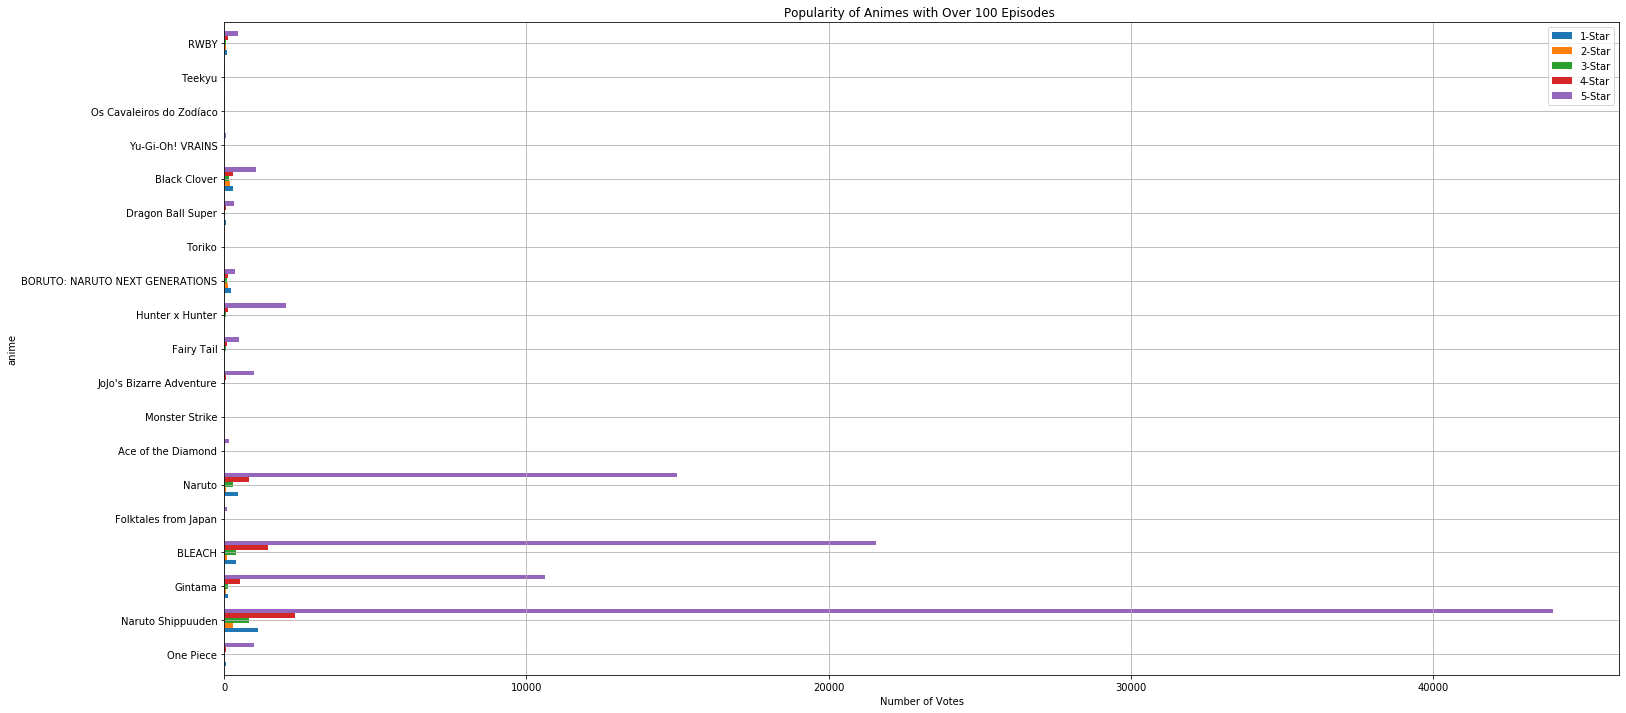

In [42]:
#Puting the popularity of the longest shows in comparison by visual form


long_rate=long_cruch.set_index('anime')
long_rate=long_rate.drop(columns=['episodes','votes','rate'])
long_rate=long_rate.rename(columns={'rate_1':'1-Star','rate_2':'2-Star','rate_3':'3-Star','rate_4':'4-Star','rate_5':'5-Star'})
long_rate.plot(kind='barh', figsize=(25,12), width=0.7)
plt.xlabel('Number of Votes')
plt.title('Popularity of Animes with Over 100 Episodes ')
plt.grid()
plt.savefig('Popularity of Animes with Over 100 Episodes in Crunchyroll')

#The popularity of Naruto Shippuden (1st) is twice of Bleach (2nd). After Naruto(3rd) and Gintama(4th), the rest look small. 
#One of Naruto Franchise, 'Boruto: Naruto Next Generation', is voted by a vastly lower amount than its predecessors.

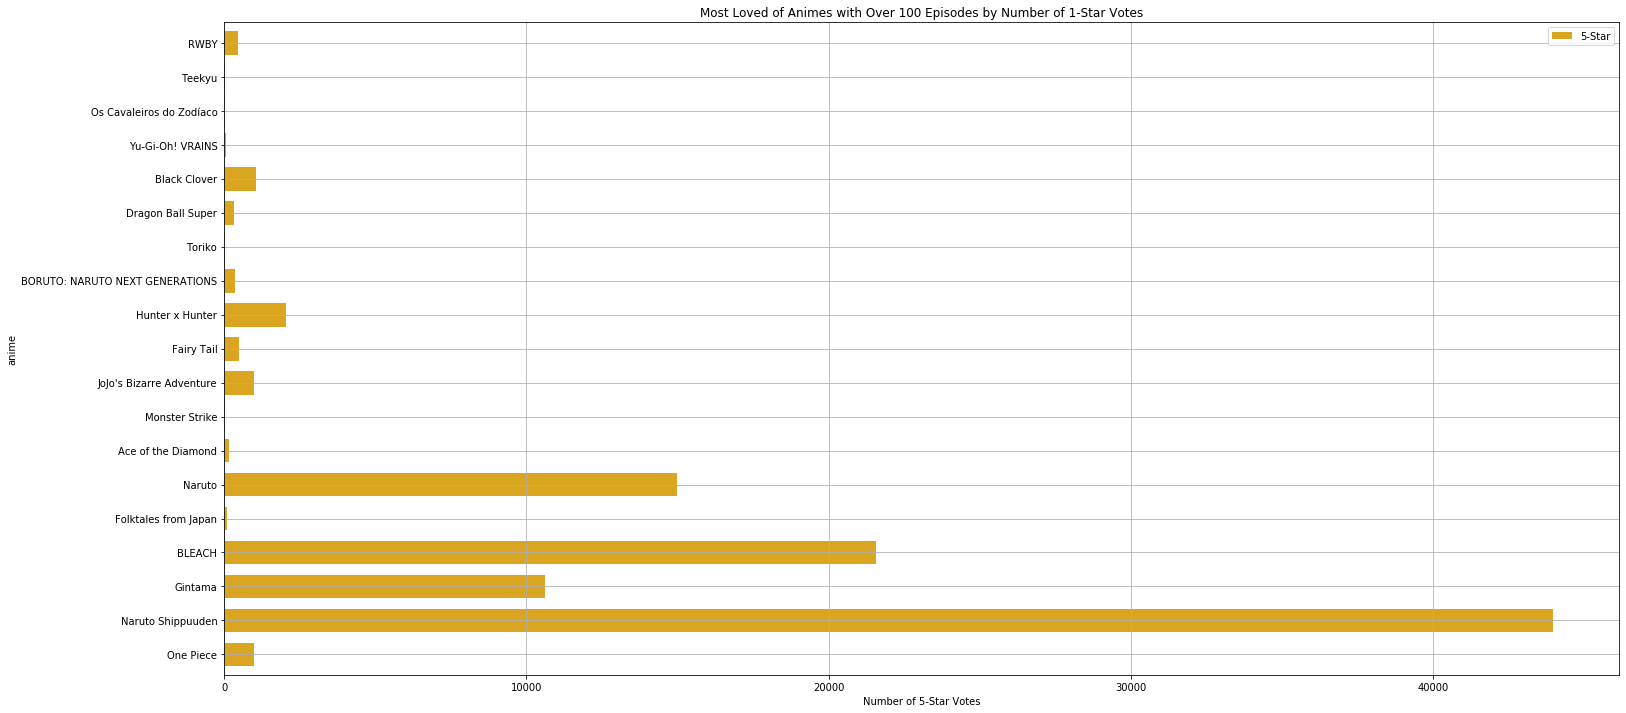

In [43]:
#Looking at the most loved by the number of votes

five_rate=long_cruch.set_index('anime')
five_rate=five_rate.drop(columns=['episodes','votes','rate','rate_1','rate_2','rate_3','rate_4'])
five_rate=five_rate.rename(columns={'rate_5':'5-Star'})
five_rate.plot(kind='barh', figsize=(25,12), width=0.7, color='goldenrod')
plt.xlabel('Number of 5-Star Votes')
plt.title('Most Loved of Animes with Over 100 Episodes by Number of 1-Star Votes')
plt.grid()
plt.savefig('Most Loved Animes with Over 100 Episodes in Crunchyroll')


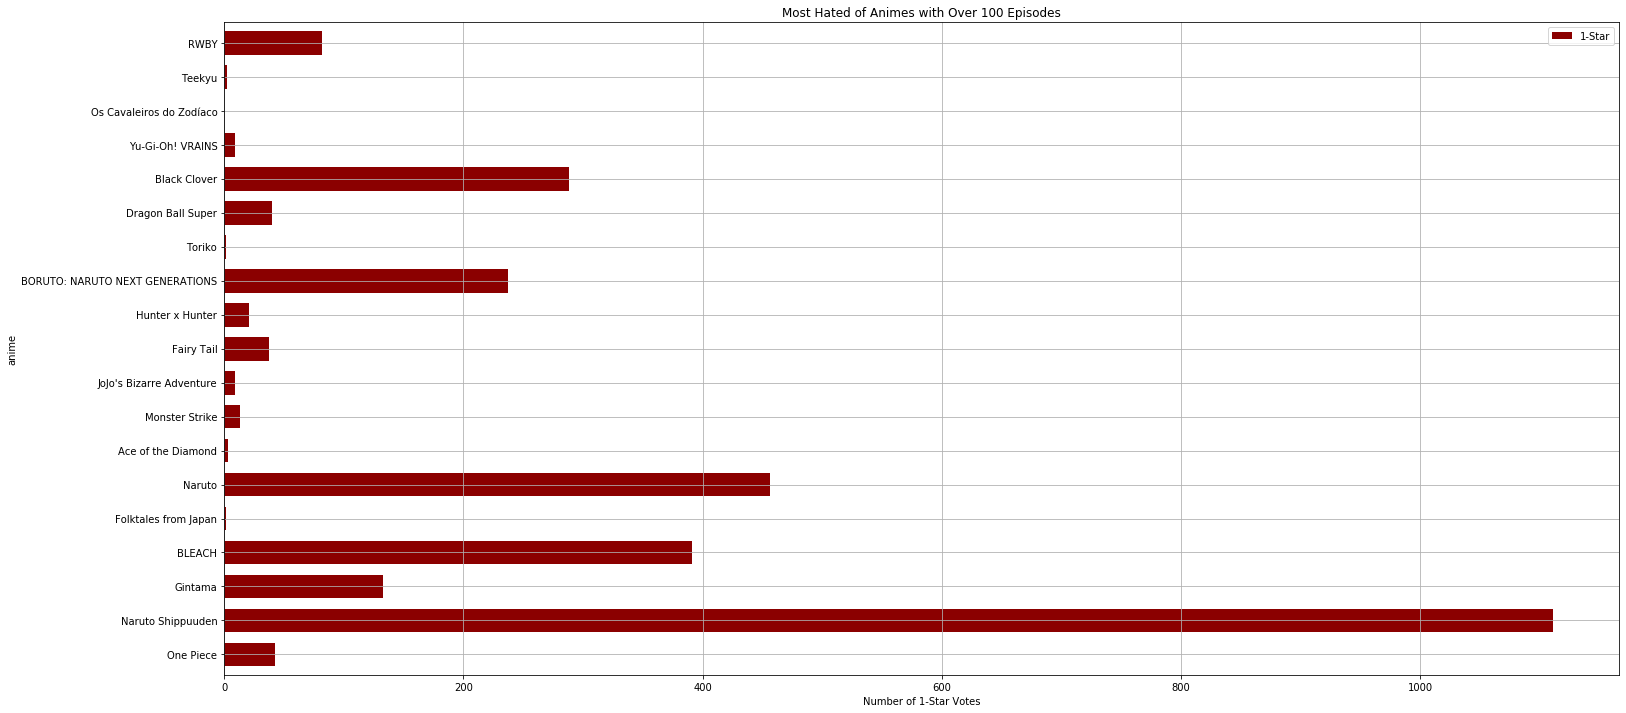

In [41]:
#Looking at the most hated by the number of votes


one_rate=long_cruch.set_index('anime')
# five_rate=five_rate.drop(columns=['episodes','votes','rate','rate_2','rate_3','rate_4','rate_5'])
# five_rate=five_rate.rename(columns={'rate_5':'5-Star', 'rate_1': '1-Star'})
one_rate=one_rate.drop(columns=['episodes','votes','rate','rate_5','rate_2','rate_3','rate_4'])
one_rate=one_rate.rename(columns={'rate_1':'1-Star'})
one_rate.plot(kind='barh', figsize=(25,12), width=0.7, color='darkred')
plt.xlabel('Number of 1-Star Votes')
plt.title('Most Hated of Animes with Over 100 Episodes by Number of 1-Star Votes')
plt.grid()
plt.savefig('Most Hated of Animes with Over 100 Episodes in Crunchyroll')

In [ ]:
# five_rate=five_rate.drop(columns=['episodes','votes','rate','rate_2','rate_3','rate_4'])


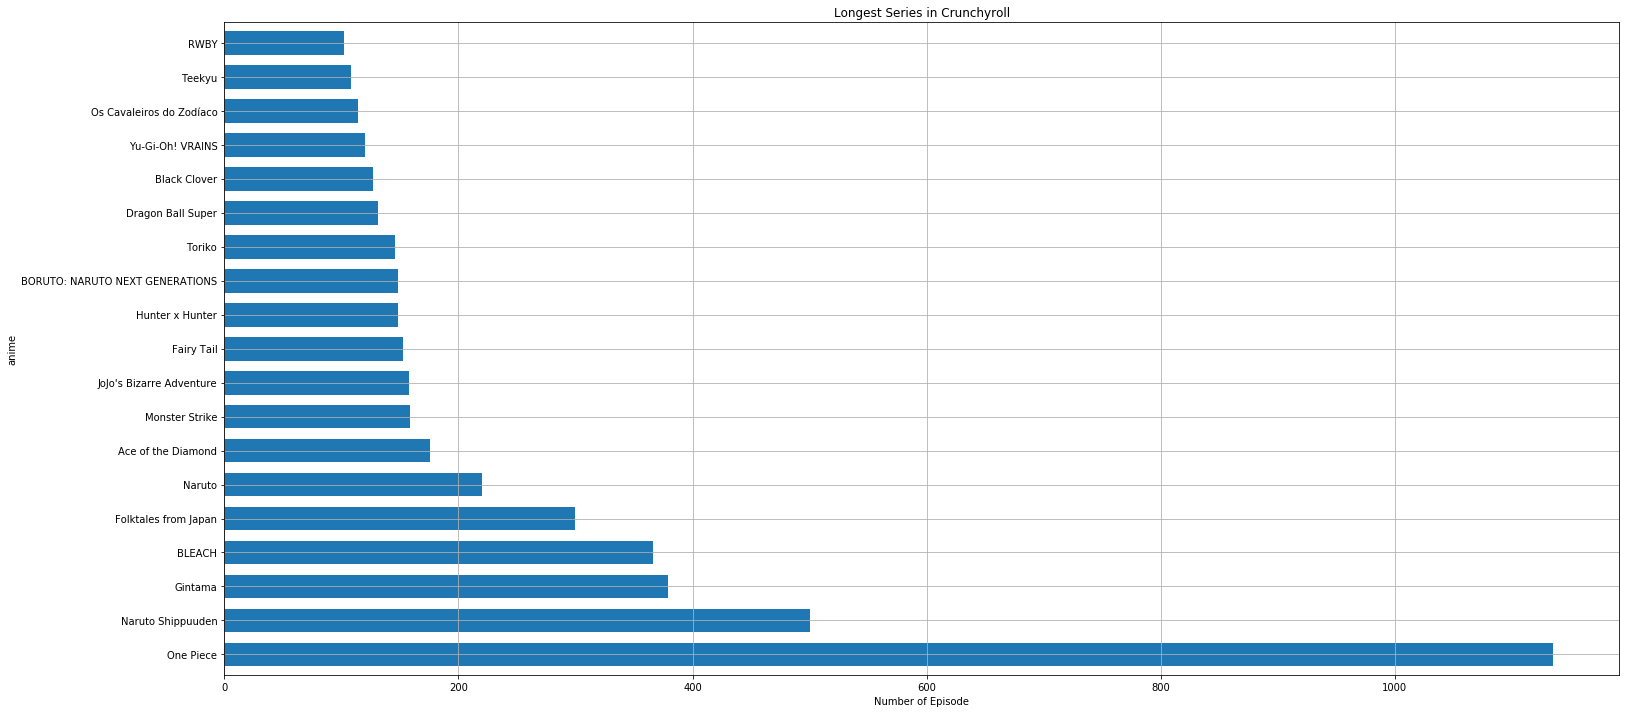

In [16]:
#Puting  longest shows in visual form

longest=long_cruch.set_index('anime')
longest=longest.drop(columns=['rate_1','rate_2','rate_3','rate_4','rate_5','votes','rate'])
longest.plot(kind='barh', figsize=(25,12), width=0.7, legend=False)
plt.xlabel('Number of Episode')
plt.title('Longest Series in Crunchyroll')
plt.grid()
plt.savefig('Longest Series in Crunchyroll')
